In [ ]:
import pandas as pd
import sklearn

In [12]:
columnas=['edad','clase_de_trabajo','cantidad_personas','educacion',
            'anios_de_estudio','estado_civil','ocupacion','relaciones','raza',
            'sexo','ganancia_capital','perdida_de_capital','horas_por_semana','pais','ganancia']
# Load the Census dataset
data = pd.read_csv("./datos/adult.data",names=columnas, na_values=['?'] )

display(data.head(5))

,edad,clase_de_trabajo,cantidad_personas,educacion,anios_de_estudio,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_de_capital,horas_por_semana,pais,ganancia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Ajustar un modelo para el conjunto de datos. El conjunto de datos contiene información de una
población con la cual se intenta predecir si puede o no cobrar más de 50.000 dólares anuales.

In [17]:
# valores faltantes por columna
data=data.dropna(axis = 0)
display(data.isnull().sum())

len(data)


edad                  0
clase_de_trabajo      0
cantidad_personas     0
educacion             0
anios_de_estudio      0
estado_civil          0
ocupacion             0
relaciones            0
raza                  0
sexo                  0
ganancia_capital      0
perdida_de_capital    0
horas_por_semana      0
pais                  0
ganancia              0
dtype: int64

30162

In [24]:
data_complete=data.drop(labels=['cantidad_personas'] , axis=1)
#display(data_complete.head(5))
#display(data_complete.describe())
#display(data_complete.corr())
#display(data_complete.dtypes)

# TODO: Total number of records
n_records = len(data_complete)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k =  len(data_complete[data_complete['ganancia'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data_complete[data_complete['ganancia'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k*100)/n_records,2)
print("total:",str(n_records))
print(">50k:",n_greater_50k)
print("<=50k:",n_at_most_50k)

total: 30162
>50k: 7508
<=50k: 22654


In [28]:
# Split the data into features and target label
Y = data_complete['ganancia']
X = data_complete.drop(labels=['ganancia'],axis=1)


columnas=list(X.columns)
tipos=list(X.dtypes)


def function_dummies(df):
    df_dummies=df
    colnames=df.columns
    for c in colnames:
        if df[c].dtypes=='object':
            col=  pd.get_dummies(df[c])
            df_dummies[c+"_"+col.columns]=col
            df_dummies = df_dummies.drop(labels=[c],axis=1)
    return (df_dummies)

X_dummies=function_dummies(X)
display(X_dummies.head(5))

# TODO: Encode the 'income_raw' data to numerical values
Y = Y.str.replace('<=50K','0')
Y = Y.replace('>50K','1')

,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Portugal,pais_Puerto-Rico,pais_Scotland,pais_South,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30
(genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó).
Indique que cantidad de casos quedaron para cada ambiente.

In [41]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


print(">50k train",y_train[y_train=='1'].count())
print("<50 train",y_train[y_train=='0'].count())


print(">50k test",y_test[y_test=='1'].count())
print("<50 test",y_test[y_test=='0'].count())


Training set has 21113 samples.
Testing set has 9049 samples.
>50k train 5223
<50 train 15890
>50k test 2285
<50 test 6764


Ajuste el mejor modelo posible . Indique el modelo con todas sus variables.

In [44]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
modelo = tree.DecisionTreeClassifier(criterion='entropy',                      
                                            max_depth = 4
                                           )
modelo.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

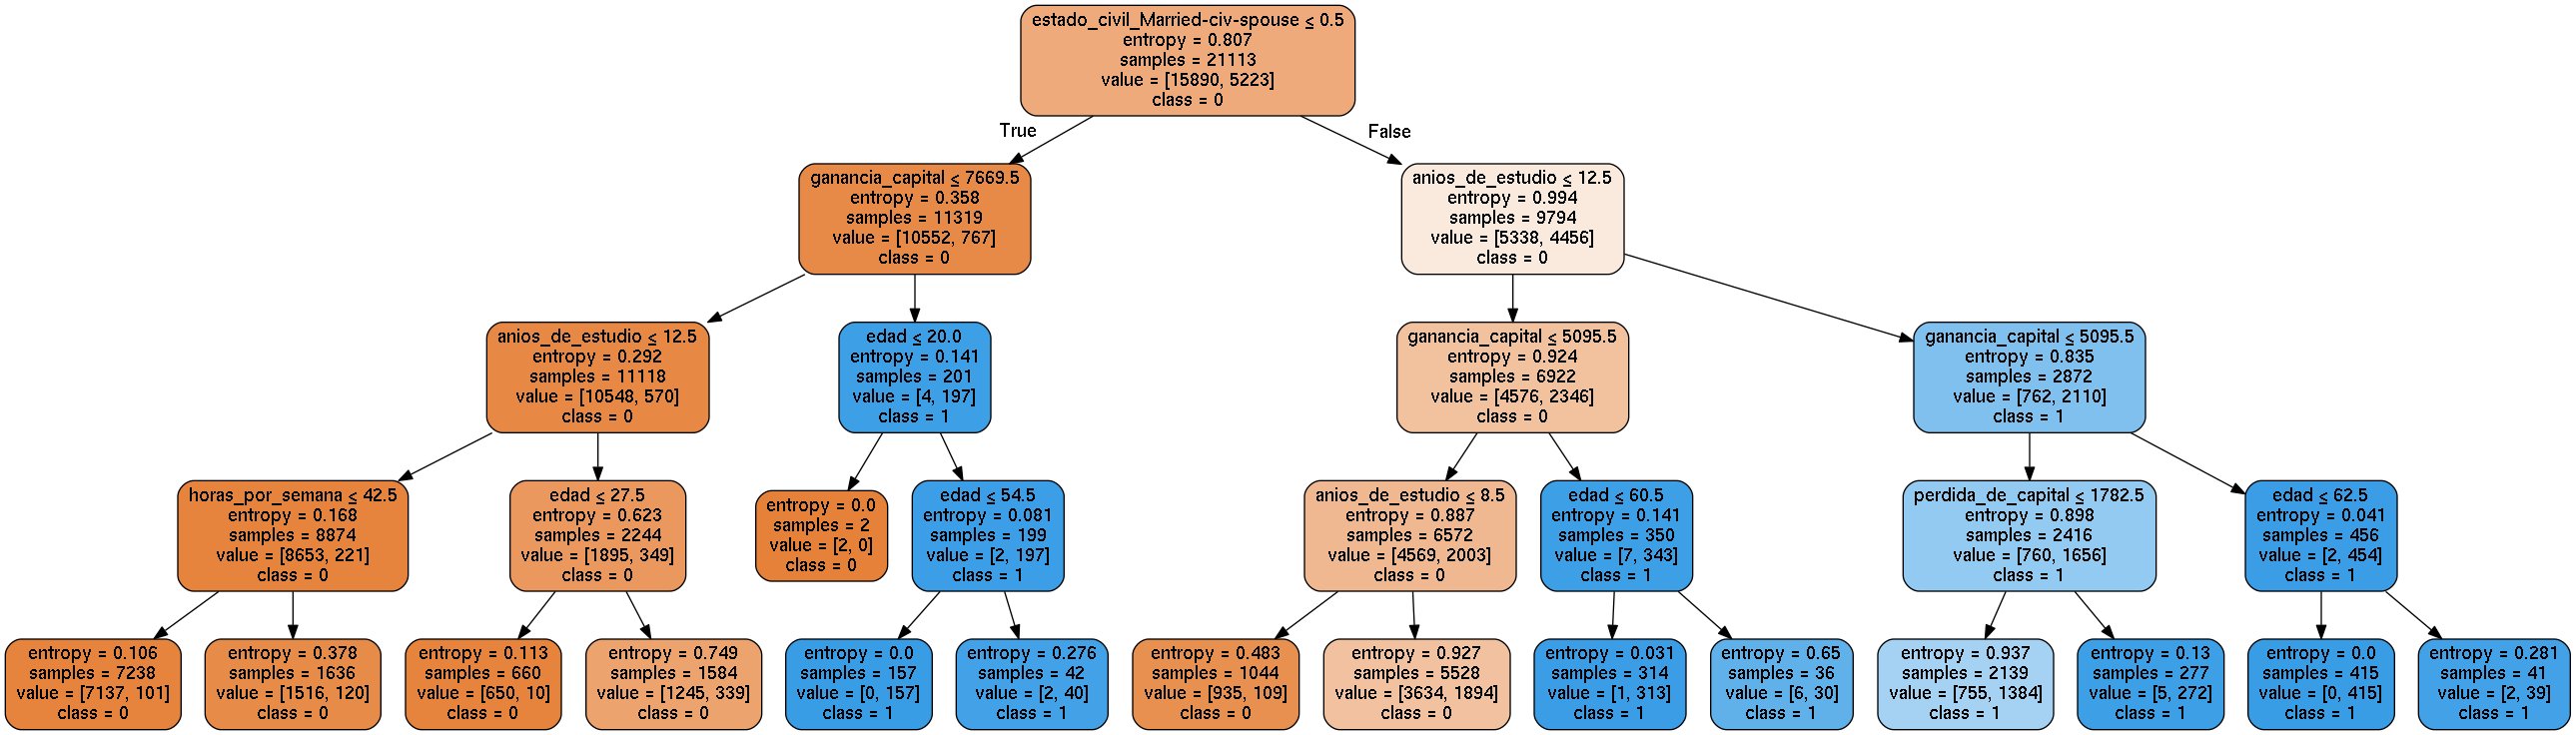

In [46]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol1.png')
Image(graph.create_png())

Calcular la perfomarnce y el AUC y el gráfico ROC en entrenamiento y validación
indicando también el total de casos de cada una de las clases.

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Predict the response for test dataset
y_pred_test = modelo.predict(X_test)
#y_pred_train = modelo.predict(X_train)

#n_samples / (n_classes * np.bincount(y))

display('Test:',confusion_matrix(y_test, y_pred_test))
#display('Train:',confusion_matrix(y_train, y_pred_train))


print("accuracy test:",accuracy_score(y_test, y_pred_test))
#print("accuracy train:",accuracy_score(y_train, y_pred_train))
print((6395+1178)/len(y_test))


'Test:'

array([[6395,  369],
       [1107, 1178]])

accuracy test: 0.836888053929
0.8368880539286109


Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la
siguiente lógica. Entregue los resultados indicados:
 Al azar e indique la cantidad de individuos que cobran más de 50.000 dólares.
 Utilizando el modelo desarrollado en el punto 1.1.2 e indique la cantidad de
individuos que cobran más de 50.000 dólares.

In [49]:
X_test_75, X_test_25, y_test_75, y_test_25 = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

#cantidad de individuos >50k al azar
print ("total 25%",y_test_25.count())
print(">50k test 25% azar",y_test_25[y_test_25=='1'].count())



total 25% 2263
>50k test 25% azar 548


In [56]:
probs_test = modelo.predict_proba(X_test)    

data_set_test=X_test.copy()
data_set_test['predicho']=y_pred_test
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['real']=y_test

display(data_set_test.head(5))

,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia,predicho,predicho_prob_1,predicho_prob_0,real
2135,44,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0.013954,0.986046,0
15639,21,10,0,0,20,0,0,1,0,0,...,0,0,0,1,0,0,0,0.013954,0.986046,0
29059,36,10,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0.342619,0.657381,0
27523,30,11,0,0,49,0,0,0,0,1,...,0,0,0,1,0,0,0,0.073350,0.926650,0
9280,42,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0.342619,0.657381,0


In [58]:
##cantidad de individuos >50k modelo
y_test_modelo=data_set_test.sort(['predicho_prob_1'], ascending=[False])[1:y_test_25.count()]
print(">50k test 25% modelo",len(y_test_modelo[y_test_modelo['real'] == '1']))
#data_set_test.sort_values(by='predicho_prob_1', ascending=False)
y_test_modelo

>50k test 25% modelo 1423


,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia,predicho,predicho_prob_1,predicho_prob_0,real
31531,28,14,7298,0,40,0,1,0,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
25789,59,15,15024,0,50,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
24321,47,9,8614,0,44,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
4680,39,13,15024,0,50,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
18598,46,15,15024,0,40,0,0,0,0,1,...,0,0,0,1,0,0,1,1.000000,0.000000,1
27232,44,11,8614,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
28244,43,13,8614,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
1787,39,14,15024,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
9348,45,13,15024,0,60,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
12874,30,14,15024,0,60,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0.000000,1
